# What is the most optimal skill to learn for Data Engineer
## Methodology

- 1. Group Skills to determine median salary and likelihood of being in posting
- 2. Visualize median salary vs percent skill demand
- 3. (Optional) Determine if certain technologies are more prevalent

In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

#loading dataset
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

#Data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [3]:
df_DE_US = df[(df['job_country'] == 'United States') &  (df['job_title_short'] == 'Data Engineer')].copy()
df_DE_US.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
11,Data Engineer,Data Engineer,"Colorado Springs, CO (+3 others)",via The Muse,Full-time,False,"Texas, United States",2023-11-03 13:06:51,False,True,United States,None,NaN,NaN,Philips,"[python, qlik]","{'analyst_tools': ['qlik'], 'programming': ['p..."
26,Data Engineer,Data Engineer,United States,via LinkedIn,Full-time,False,Georgia,2023-09-15 13:56:18,True,False,United States,None,NaN,NaN,Infinite Computer Solutions,None,None
27,Data Engineer,"Principal Data Engineer (Lead), Knowledge Grap...","San Francisco, CA",via LinkedIn,Full-time,False,Georgia,2023-02-18 13:31:24,False,False,United States,None,NaN,NaN,Altos Labs,"[python, r, java]","{'programming': ['python', 'r', 'java']}"


In [4]:
df_DE_US = df_DE_US.dropna(subset= ['salary_year_avg'])
df_DE_exploded = df_DE_US.explode('job_skills')
df_DE_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
92,120000.0,sql
92,120000.0,python
146,129500.0,golang
146,129500.0,scala
146,129500.0,python


In [15]:
df_DE_skills = df_DE_exploded.groupby('job_skills')['salary_year_avg'].agg(['median', 'count']).sort_values(by='count', ascending=False).head(12)

df_DE_skills = df_DE_skills.rename(columns={'median': 'median_salary', 'count': 'skill_count'})

DE_job_count = len(df_DE_US)

df_DE_skills['skill_percent'] = (df_DE_skills['skill_count'] / DE_job_count) * 100
df_DE_skills

,median_salary,skill_count,skill_percent
job_skills,,,
sql,125000.00000,2110,72.384220
python,127794.50000,2007,68.850772
aws,131000.00000,1313,45.042882
spark,137410.15625,968,33.207547
azure,125000.00000,961,32.967410
snowflake,130700.00000,765,26.243568
java,137000.00000,732,25.111492
kafka,145000.00000,536,18.387650
nosql,140000.00000,519,17.804460


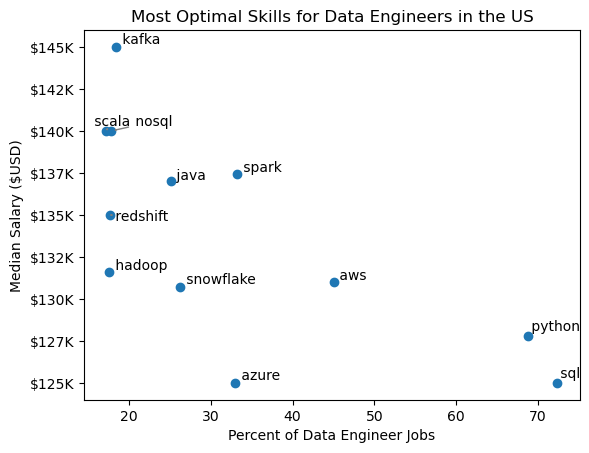

In [16]:
from adjustText import adjust_text

plt.scatter(df_DE_skills['skill_percent'], df_DE_skills['median_salary'])
plt.xlabel('Percent of Data Engineer Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Engineers in the US')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DE_skills.index):
    texts.append(plt.text(df_DE_skills['skill_percent'].iloc[i], df_DE_skills['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

In [17]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['nuix',
  'esquisse',
  'sheets',
  'microstrategy',
  'power bi',
  'sap',
  'word',
  'ssrs',
  'datarobot',
  'spreadsheet',
  'qlik',
  'msaccess',
  'sas',
  'dax',
  'spss',
  'cognos',
  'sharepoint',
  'outlook',
  'powerpoint',
  'ms access',
  'visio',
  'tableau',
  'excel',
  'splunk',
  'powerbi',
  'ssis',
  'looker',
  'alteryx'],
 'programming': ['haskell',
  'lua',
  'r',
  'go',
  'c++',
  'mongo',
  'golang',
  'crystal',
  'ocaml',
  'rust',
  'clojure',
  'javascript',
  'nosql',
  'c',
  'no-sql',
  'typescript',
  'scala',
  'sql',
  'powershell',
  'vba',
  'dart',
  'sas',
  'objective-c',
  'mongodb',
  'visual basic',
  'sass',
  'c#',
  'lisp',
  'visualbasic',
  'perl',
  'julia',
  'groovy',
  'python',
  'pascal',
  'vb.net',
  'assembly',
  'swift',
  'erlang',
  'apl',
  'solidity',
  'cobol',
  'html',
  'f#',
  't-sql',
  'delphi',
  'java',
  'fortran',
  'bash',
  'ruby',
  'kotlin',
  'matlab',
  'css',
  'php',
  'elixir',
  'sh

In [18]:
# turn dictionary into dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,nuix
0,analyst_tools,esquisse
0,analyst_tools,sheets
0,analyst_tools,microstrategy
0,analyst_tools,power bi
...,...,...
9,sync,twilio
9,sync,ringcentral
9,sync,mattermost
9,sync,slack


In [20]:
df_plot = df_DE_skills.merge(df_technology, left_on='job_skills', right_on='skills')

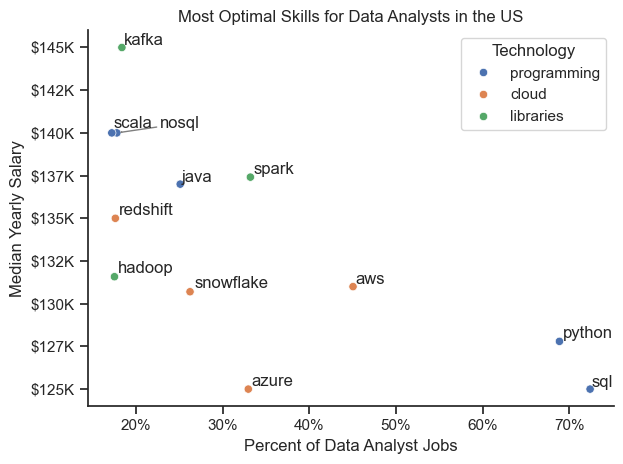

In [25]:
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology',
)

sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DE_skills.index):
    texts.append(plt.text(df_DE_skills['skill_percent'].iloc[i], df_DE_skills['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()